# Predicting whether Citibank customer is going to default
## File descriptions:
#### Y: Client's behavior (target); Y=0 then not default, Y=1 then default.
#### X1 - Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family             (supplementary) credit.
#### X2 :Gender (1 = male; 2 = female)
#### X3 : Education (1 = graduate school; 2 = university; 3 = high school; 0,4,5,6 = others)
#### X4 : Marital status (1 = married; 2 = single; 3 = divorce; 0=others).
#### X5 : Age (year)
#### X6 : the repayment status in September, 2005;  
#### X7 :the repayment status in August, 2005 . . .
#### X11 : the repayment status in April, 2005. The measurement scale for the repayment status is: -2 = No           consumption; -1     =                      pay duly; ; 0: The use of revolving credit; 1 = payment delay for one month; 2 = payment  delay  for two months; . .   .; 8 =                        payment delay for eight months; 9 = payment delay for nine months and above
#### X12 : amount of bill statement in September, 2005
#### X13 : amount of bill statement in August, 2005; . . .
#### X17 : amount of bill statement in April, 2005.

# Exploring and Processing Data

In [3]:
#imports
import numpy as np
import pandas as pd
from scipy.stats import zscore
from sklearn.preprocessing import Imputer
from sklearn.metrics import accuracy_score
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.preprocessing import Imputer
from sklearn.metrics import accuracy_score
from sklearn import metrics

# import data

In [77]:
data1=pd.read_csv("train_1.csv")
data2=pd.read_csv("train_2.csv")
fdata=pd.read_csv("train_3.csv")
test=pd.read_csv("test.csv")

In [5]:
#to look at directory
%pwd

'C:\\Users\\sreekar chidurala\\Desktop\\kaggle projects\\week 5 city bank'

In [78]:
#merging data1 and data2
dat=pd.merge(data1,data2)
data=pd.merge(dat,fdata)
data.head()

,Ref.No,X1,X2,X3,X4,X5,X6,X7,Y,X8,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,22203,320000,2,1,2,27,1,2,1,2,...,41370,40694,39606,38680,2000,1500,2000,1500,1500,0
1,1288,470000,1,2,1,41,-2,-2,0,-2,...,32463,20621,13711,8294,12300,32520,34,68,8334,45684
2,11822,20000,1,2,2,25,1,2,0,0,...,18921,19297,18926,17717,1264,1249,625,700,1000,1000
3,15085,80000,1,3,1,41,0,0,1,0,...,60311,62471,21071,2099,3008,3000,5000,10000,2099,0
4,6192,30000,1,1,2,30,1,-2,1,-2,...,0,0,0,0,0,0,0,0,0,0


In [83]:
#Assigning col names
da=pd.merge(data1,data2)
data3=pd.merge(da,fdata)

data3.columns = ["Ref.N","total_credit","Gender","Education","Marital_status","Age","Sep2005_history","Aug2005_history","Behavior","july2005_history","june2005_history","May2005_history","April2005_history","Amt_sep","Amt_aug","Amt_july","Amt_june","Amt_may","Amt_aprl","prev_pay_sep","prev_pay_aug","prev_pay_july","prev_pay_june","prev_pay_may","prev_pay_aprl"]
data3.head()



,Ref.N,total_credit,Gender,Education,Marital_status,Age,Sep2005_history,Aug2005_history,Behavior,july2005_history,...,Amt_july,Amt_june,Amt_may,Amt_aprl,prev_pay_sep,prev_pay_aug,prev_pay_july,prev_pay_june,prev_pay_may,prev_pay_aprl
0,22203,320000,2,1,2,27,1,2,1,2,...,41370,40694,39606,38680,2000,1500,2000,1500,1500,0
1,1288,470000,1,2,1,41,-2,-2,0,-2,...,32463,20621,13711,8294,12300,32520,34,68,8334,45684
2,11822,20000,1,2,2,25,1,2,0,0,...,18921,19297,18926,17717,1264,1249,625,700,1000,1000
3,15085,80000,1,3,1,41,0,0,1,0,...,60311,62471,21071,2099,3008,3000,5000,10000,2099,0
4,6192,30000,1,1,2,30,1,-2,1,-2,...,0,0,0,0,0,0,0,0,0,0


# EDA

In [84]:
data.shape


(21600, 25)

In [85]:
data.dtypes
#every features is in int type.

Ref.No    int64
X1        int64
X2        int64
X3        int64
X4        int64
X5        int64
X6        int64
X7        int64
Y         int64
X8        int64
X9        int64
X10       int64
X11       int64
X12       int64
X13       int64
X14       int64
X15       int64
X16       int64
X17       int64
X18       int64
X19       int64
X20       int64
X21       int64
X22       int64
X23       int64
dtype: object

In [86]:
data3[data3.Gender==2]
len(data3[data3.Gender==2])
print('number of male customers : {0}'.format(len(data3[data3.Gender==2])))

number of male customers : 13543


In [88]:
data3[data3.Gender==1]
len(data3[data3.Gender==1])
print('number of female customers : {0}'.format(len(data3[data3.Gender==1])))

number of female customers : 8057


In [89]:
data3[data3.Education==1]
len(data3[data3.Education==1])
print('number of school graduated customers : {0}'.format(len(data3[data3.Education==1])))

number of school graduated customers : 7627


In [90]:
data3[data3.Education==2]
len(data3[data3.Education==2])
print('number of university graduated customers : {0}'.format(len(data3[data3.Education==2])))

number of university graduated customers : 10211


In [91]:
data3[data3.Education==3]
len(data3[data3.Education==3])
print('number of high school graduated customers : {0}'.format(len(data3[data3.Education==3])))

number of high school graduated customers : 3447


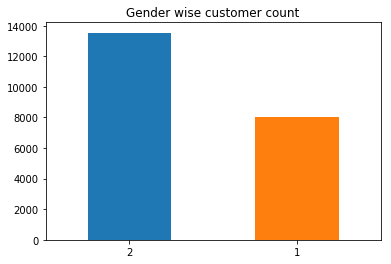

In [92]:
#bar chart of gender
data3.Gender.value_counts().plot(kind="bar",rot = 0, title='Gender wise customer count')

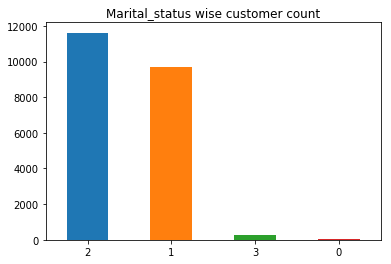

In [93]:
#bar chart of Marital_status
data3.Marital_status.value_counts().plot(kind="bar",rot = 0, title='Marital_status wise customer count')

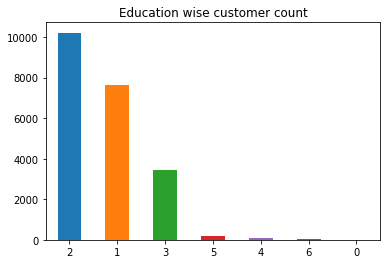

In [94]:
#bar chart of education
data3.Education.value_counts().plot(kind="bar",rot = 0, title='Education wise customer count')

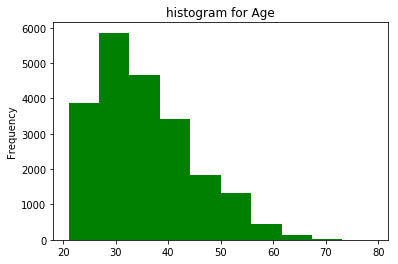

In [95]:
data3.Age.plot(kind='hist', title='histogram for Age', color='green')

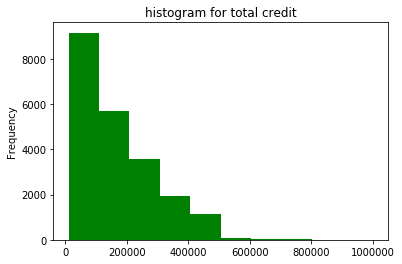

In [96]:
#to determine the out liers
data3.total_credit.plot(kind='hist', title='histogram for total credit', color='green')

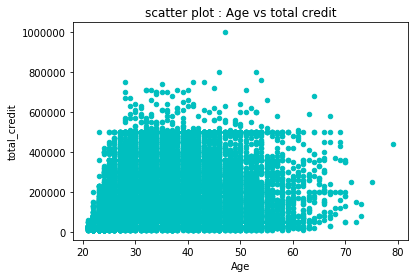

In [97]:
# use scatter plot for bi-variate distribution
data3.plot.scatter(x='Age', y='total_credit', color='c', title='scatter plot : Age vs total credit');

## Grouping and aggregations

In [98]:
# crosstab on Gender and Behavior
pd.crosstab(data3.Gender, data3.Behavior)

Behavior,0,1
Gender,,
1,6086,1971
2,10680,2863


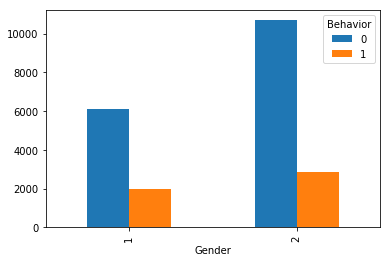

In [99]:
pd.crosstab(data3.Gender, data3.Behavior).plot(kind='bar')

In [100]:
# crosstab on Education and Behavior
pd.crosstab(data3.Education, data3.Behavior)

Behavior,0,1
Education,,
0,9,0
1,6114,1513
2,7776,2435
3,2583,864
4,78,4
5,176,14
6,30,4


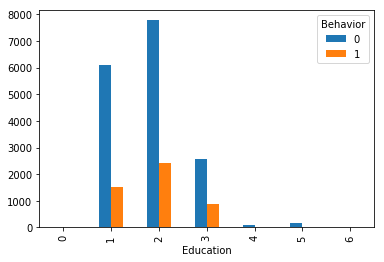

In [101]:
pd.crosstab(data3.Education, data3.Behavior).plot(kind='bar')

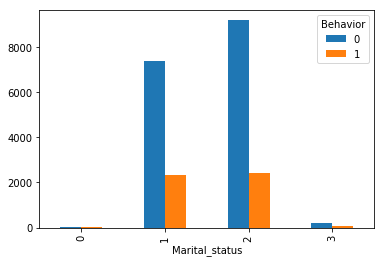

In [102]:
pd.crosstab(data3.Marital_status, data3.Behavior).plot(kind='bar')

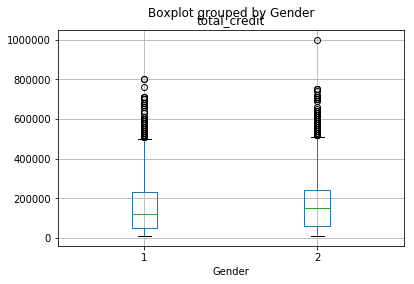

In [103]:
data3.boxplot('total_credit','Gender');

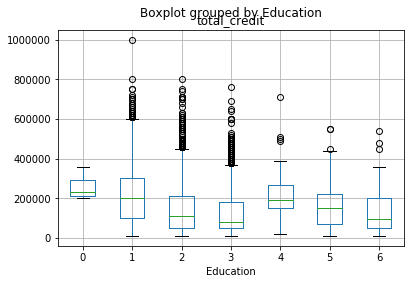

In [104]:
data3.boxplot('total_credit','Education');

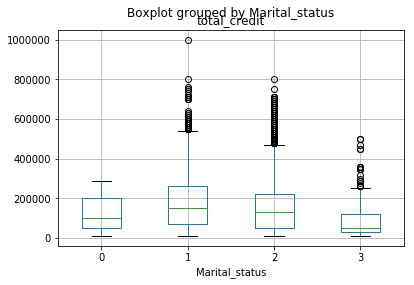

In [105]:
data3.boxplot('total_credit','Marital_status');

C:\Users\sreekar chidurala\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


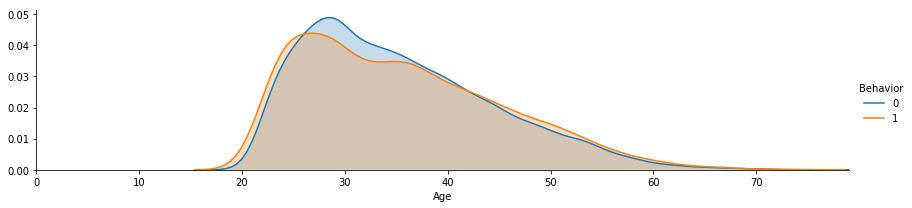

In [106]:

facet = sns.FacetGrid(data3, hue="Behavior",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, data3['Age'].max()))
facet.add_legend();
 


C:\Users\sreekar chidurala\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


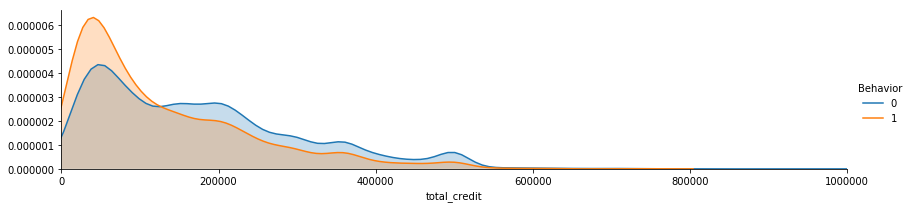

In [107]:
facet = sns.FacetGrid(data3, hue="Behavior",aspect=4)
facet.map(sns.kdeplot,'total_credit',shade= True)
facet.set(xlim=(0, data3['total_credit'].max()))
facet.add_legend();
 

C:\Users\sreekar chidurala\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


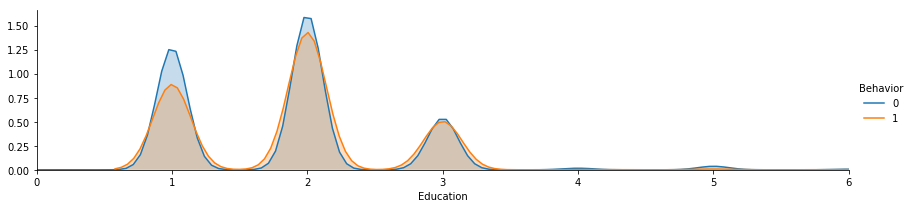

In [108]:
facet = sns.FacetGrid(data3, hue="Behavior",aspect=4)
facet.map(sns.kdeplot,'Education',shade= True)
facet.set(xlim=(0, data3['Education'].max()))
facet.add_legend();

# Model1:DecisionTree Classifier

In [109]:
df = data.drop(labels = "Ref.No", axis = 1)


In [110]:
df1=df.drop(labels= "Y" , axis = 1)
df1.head()


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,320000,2,1,2,27,1,2,2,2,2,...,41370,40694,39606,38680,2000,1500,2000,1500,1500,0
1,470000,1,2,1,41,-2,-2,-2,-2,-2,...,32463,20621,13711,8294,12300,32520,34,68,8334,45684
2,20000,1,2,2,25,1,2,0,0,0,...,18921,19297,18926,17717,1264,1249,625,700,1000,1000
3,80000,1,3,1,41,0,0,0,0,0,...,60311,62471,21071,2099,3008,3000,5000,10000,2099,0
4,30000,1,1,2,30,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0


In [111]:
#y_lables
y_labels = data["Y"]
y_labels.head()

0    1
1    0
2    0
3    1
4    1
Name: Y, dtype: int64

In [112]:
#Applying Z-score for table df1
z_data= df1.apply(zscore)
z_data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,1.199622,0.771310,-1.082964,0.845402,-0.904582,0.890581,1.767277,1.791855,1.899712,1.981181,...,-0.069127,-0.022403,-0.002437,0.007249,-0.233854,-0.204441,-0.181426,-0.214096,-0.212969,-0.295981
1,2.362316,-1.296495,0.197247,-1.070322,0.606227,-1.773392,-1.560885,-1.530739,-1.532139,-1.534625,...,-0.199883,-0.341392,-0.432164,-0.507905,0.455076,1.288822,-0.301621,-0.308090,0.232078,2.310904
2,-1.125765,-1.296495,0.197247,0.845402,-1.120412,0.890581,1.767277,0.130558,0.183787,0.223278,...,-0.398682,-0.362433,-0.345621,-0.348151,-0.283083,-0.216524,-0.265489,-0.266606,-0.245531,-0.238918
3,-0.660688,-1.296495,1.477459,-1.070322,0.606227,0.002590,0.103196,0.130558,0.183787,0.223278,...,0.208930,0.323666,-0.310025,-0.612933,-0.166433,-0.132233,0.001985,0.343829,-0.173961,-0.295981
4,-1.048252,-1.296495,-1.082964,0.845402,-0.580837,0.890581,-1.560885,-1.530739,-1.532139,-1.534625,...,-0.676445,-0.669091,-0.659698,-0.648519,-0.367627,-0.276649,-0.303700,-0.312553,-0.310653,-0.295981


In [113]:
X = np.array(z_data)
Y = np.array(y_labels)

In [132]:
DTClassifier_1= DecisionTreeClassifier(max_depth=12, min_samples_split = 3, min_samples_leaf=5)
DTClassifier_1.fit (X,Y)
predicted_labels = DTClassifier_1.predict(X)
accuracy_score_1 = accuracy_score(Y, predicted_labels)
print(accuracy_score_1)

0.8556018518518519


In [131]:
DTClassifier_2= DecisionTreeClassifier (max_depth=20, min_samples_split = 5, min_samples_leaf=5)
DTClassifier_2.fit (X,Y)
predicted_labels = DTClassifier_2.predict(X)
accuracy_score_2 = accuracy_score(Y, predicted_labels)
print(accuracy_score_2)

0.8985185185185185


In [118]:
DTClassifier_3= DecisionTreeClassifier (max_depth=20, min_samples_split = 5,criterion='gini', min_samples_leaf=2)
DTClassifier_3.fit (X,Y)
predicted_labels = DTClassifier_3.predict(X)
accuracy_score_3 = accuracy_score(Y, predicted_labels)
print(accuracy_score_3)

0.9248611111111111


In [119]:
DTClassifier_4 = DecisionTreeClassifier (max_depth=25,criterion='gini',min_samples_split = 3, random_state = 0)
DTClassifier_4.fit (X,Y)
predicted_labels = DTClassifier_4.predict(X)
accuracy_score_4 = accuracy_score(Y, predicted_labels)
print(accuracy_score_4)

0.972037037037037


# the above best model can try on test data for responce

In [41]:
test.head()

,Ref.No,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,17083,50000,2,1,2,25,0,0,0,0,...,38008,31898,20154,2000,5040,8034,3029,5000,49436,NaN
1,3494,120000,2,2,2,24,0,0,0,0,...,6761,7189,1087,1400,1000,0,1000,1087,801,NaN
2,21945,120000,2,2,2,27,1,-2,-1,-1,...,0,0,0,0,2382,0,0,0,0,NaN
3,3499,60000,1,1,2,28,0,-1,0,0,...,9900,310,160,6000,10000,900,310,0,3400,NaN
4,18973,100000,2,1,2,28,3,2,0,0,...,53407,51951,53195,0,1831,4339,0,2083,1939,NaN


In [121]:
#we need the relevent columns in the test data.
test1 = test.drop(labels = ["Ref.No","Y"],axis = 1)
test1.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,50000,2,1,2,25,0,0,0,0,0,...,40002,38008,31898,20154,2000,5040,8034,3029,5000,49436
1,120000,2,2,2,24,0,0,0,0,0,...,11761,6761,7189,1087,1400,1000,0,1000,1087,801
2,120000,2,2,2,27,1,-2,-1,-1,-2,...,2382,0,0,0,0,2382,0,0,0,0
3,60000,1,1,2,28,0,-1,0,0,-1,...,13421,9900,310,160,6000,10000,900,310,0,3400
4,100000,2,1,2,28,3,2,0,0,2,...,49899,53407,51951,53195,0,1831,4339,0,2083,1939


###### Since the samples are unbalanced,we can use SMOTE library for better prediction.

In [122]:
#Applying z_score for table test1
test_z= test1.apply(zscore)
test_z.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,-0.905841,0.750244,-1.119057,0.87266,-1.113037,0.004933,0.099271,0.109695,0.160042,0.214357,...,-0.130507,-0.105122,-0.169515,-0.350304,-0.246512,-0.066375,0.225386,-0.138208,0.006607,2.382991
1,-0.367961,0.750244,0.180371,0.87266,-1.220432,0.004933,0.099271,0.109695,0.160042,0.214357,...,-0.540978,-0.591105,-0.574173,-0.664943,-0.283815,-0.258765,-0.368885,-0.318905,-0.263640,-0.237817
2,-0.367961,0.750244,0.180371,0.87266,-0.898246,0.915257,-1.583783,-0.720455,-0.691267,-1.555841,...,-0.677299,-0.696259,-0.691907,-0.682881,-0.370856,-0.192952,-0.368885,-0.407962,-0.338713,-0.280981
3,-0.829001,-1.332899,-1.119057,0.87266,-0.790850,0.004933,-0.742256,0.109695,0.160042,-0.670742,...,-0.516851,-0.542284,-0.686830,-0.680240,0.002174,0.169827,-0.302313,-0.380355,-0.338713,-0.097764
4,-0.521641,0.750244,-1.119057,0.87266,-0.790850,2.735906,1.782325,0.109695,0.160042,1.984555,...,0.013342,0.134377,0.158893,0.194930,-0.370856,-0.219192,-0.047931,-0.407962,-0.194852,-0.176493


In [320]:
#Predicting the Y values in test data set
predicted_y_labels = DTClassifier_5.predict(test_z)


In [322]:
submission=pd.DataFrame(pd.read_csv("test.csv")["Ref.No"])
for i in range(0,len(submission)):
    submission["Ref.No"][i] = i+1
submission["Y"]=predicted_y_labels
submission.head()

,Ref.No,Y
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [323]:
#for submission
submission.to_csv('day3_n.csv', index=False)

# Model2: KNN

In [277]:
#k- nerest neighbours
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.preprocessing import Imputer
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [286]:
NNH = KNeighborsClassifier(n_neighbors= 10 , weights = 'uniform', metric='euclidean',p=3)

In [287]:
from sklearn.neighbors import KNeighborsClassifier
NNH = KNeighborsClassifier(n_neighbors=21)
NNH.fit(X,Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=21, p=2,
           weights='uniform')

In [288]:
predicted_labels = NNH.predict(X)
accuracy_score_knn= accuracy_score(Y, predicted_labels)
print(accuracy_score_knn)

0.8183796296296296


In [289]:
from sklearn.neighbors import KNeighborsClassifier
NNH1 = KNeighborsClassifier(n_neighbors=5,leaf_size=50, metric='minkowski')
NNH1.fit(X,Y)
predicted_labels = NNH1.predict(X)
accuracy_score_knn1= accuracy_score(Y, predicted_labels)
print(accuracy_score_knn1)

0.8395833333333333


In [282]:
predicted_y_labels1 =NNH1.predict(test_z)

In [283]:
submission=pd.DataFrame(pd.read_csv("test.csv")["Ref.No"])
for i in range(0,len(submission)):
    submission["Ref.No"][i] = i+1
submission["Y"]=predicted_y_labels1
submission.head()

,Ref.No,Y
0,1,0
1,2,0
2,3,0
3,4,0
4,5,1


In [284]:
submission.to_csv('day3_k.csv', index=False)

##### when smote used

In [53]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(ratio=1.0)
X_sm,Y_sm=smote.fit_sample(X, Y)

In [54]:
from sklearn.neighbors import KNeighborsClassifier
NNH2 = KNeighborsClassifier(n_neighbors=5,leaf_size=50, metric='minkowski')
NNH2.fit(X_sm,Y_sm)
predicted_labels = NNH2.predict(X)
accuracy_score_knn2= accuracy_score(Y, predicted_labels)
print(accuracy_score_knn2)

0.8052314814814815


In [55]:
predicted_y_labels2 =NNH2.predict(test_z)
submission=pd.DataFrame(pd.read_csv("test.csv")["Ref.No"])
for i in range(0,len(submission)):
    submission["Ref.No"][i] = i+1
submission["Y"]=predicted_y_labels2
submission.head()


,Ref.No,Y
0,1,0
1,2,0
2,3,0
3,4,1
4,5,1


#  Model3:LogisticRegression

In [331]:
#imports
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [333]:
model = LogisticRegression()
model.fit(X,Y)
y_predict = model.predict(X)
accuracy_score_lr1= accuracy_score(Y,y_predict)
print(accuracy_score_lr1)

C:\Users\sreekar chidurala\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8083796296296296


## Validation

In [135]:
data.shape

(21600, 25)

In [136]:
features = data[["X1","X2","X3","X4","X5","X6","X7","X8","X9","X10","X11","X12","X13","X14","X15","X16","X17","X18","X19","X20","X21","X22","X23"]]


label = np.array(data["Y"])

In [137]:
### Splitting data for training and test 80/20 for our Base Model - Logistic Regression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=0)

In [138]:
X_train.shape

(17280, 23)

In [139]:
X_test.shape

(4320, 23)

In [140]:
y_train.shape

(17280,)

In [141]:
y_test.shape

(4320,)

## validation for DecisionTreeClassifier

In [318]:
DTClassifier_5= DecisionTreeClassifier (max_depth=5, min_samples_split =3,criterion='gini',min_samples_leaf=9)
DTClassifier_5.fit(X_train,y_train)
predicted_labels = DTClassifier_5.predict(X_train)
accuracy_score_4 = accuracy_score(y_train, predicted_labels)
print(accuracy_score_4)

0.8218171296296296


In [64]:
#using this model,validating this in test

In [319]:
#validation test score using DT
predicted_labels = DTClassifier_5.predict(X_test)
accuracy_score_5= accuracy_score(y_test, predicted_labels)
print(accuracy_score_5)

0.8206018518518519


In [315]:
#score for training
predicted_labels = DTClassifier_5.predict(X)
accuracy_score_5= accuracy_score(Y, predicted_labels)
print(accuracy_score_5)

0.8075462962962963


## we can use grid search method to know better p value or n_neighbour value
#### for i in range(1,15,2):

## validation for KNN

In [302]:
#validation test score using KNN
NNH3 = KNeighborsClassifier(n_neighbors= 2, weights = 'uniform',p=3)
NNH3.fit(X_train,y_train)
predicted_labels = NNH.predict(X_test)
accuracy_score_knn3= accuracy_score(y_test, predicted_labels)
print(accuracy_score_knn3)


0.7784722222222222


In [303]:
#validation training score
predicted_labels = NNH3.predict(X)
accuracy_score_knn4= accuracy_score(Y, predicted_labels)
print(accuracy_score_knn4)


0.7762037037037037


# validation for LogisticRegression

In [324]:
#imports
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [328]:
#test score
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
accuracy_score_lr= accuracy_score(y_test, y_predict)
print(accuracy_score_lr)



C:\Users\sreekar chidurala\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7782407407407408


In [330]:
#train score
model = LogisticRegression()
model.fit(X,Y)
y_predict = model.predict(X)
accuracy_score_lr1= accuracy_score(Y, y_predict)
print(accuracy_score_lr1)

C:\Users\sreekar chidurala\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8083796296296296
